In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from matplotlib import cm
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user
import math
%matplotlib inline
import seaborn as sns
import klib
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")
    

from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import VotingRegressor

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.base import ClassifierMixin
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean


import datetime
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.decomposition import PCA

### Read Data

In [2]:
df_x_train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
df_x_test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')
df_y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv').age
df_y_train_mer = pd.read_csv(os.path.abspath("../input")+'/y_train.csv')
IDtrain = pd.DataFrame({'custid': df_x_train.custid.unique()})
IDtest = pd.DataFrame({'custid': df_x_test.custid.unique()})

df = pd.concat([df_x_train, df_x_test])

eda_df = pd.merge(df_x_train , df_y_train_mer, on = 'custid')

### EDA

In [205]:
eda_df['나이대'] = eda_df['age']//10*10
eda_df['sales_month_ver1'] = eda_df['sales_month']
eda_df['sales_month'] = eda_df['sales_month'].apply(lambda x : x-12 if x > 12 else x )
eda_df['sales_hour'] = eda_df['sales_time'].apply(lambda x : x//100 )
eda_df['sales_sec'] = eda_df['sales_time'].apply(lambda x : x%100 )
eda_df['total_sec'] = eda_df['sales_time'].apply(lambda x : x//100*60 + x%100 )
eda_df['dis_per'] = (( eda_df['dis_amt'] / eda_df['tot_amt'] )*100 ).apply(lambda x : math.trunc(x))
eda_df['환불여부'] = eda_df['tot_amt'].apply(lambda x : 1 if x < 0 else 0 )
eda_df['refund'] = eda_df['tot_amt'].apply(lambda x : abs(x) if x < 0 else 0 )
eda_df['real_amt'] = ( eda_df['tot_amt'] / eda_df['inst_mon'] ).apply(lambda x : math.trunc(x)) 
eda_df['sales_date'] =eda_df['sales_month_ver1'].astype(str).apply(lambda x : "0"+x if len(x) == 1  else x ) +eda_df['sales_day'].astype(str).apply(lambda x : "0"+x if len(x) == 1 else  x )
eda_df['sales_date'] = eda_df['sales_date'].astype(int) ; eda_df.head()

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,...,나이대,sales_month_ver1,sales_hour,sales_sec,total_sec,dis_per,환불여부,refund,real_amt,sales_date
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,...,30,6,12,12,732,10,0,0,30000,625
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,...,30,6,12,42,762,10,0,0,39000,625
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,...,30,8,18,10,1090,10,0,0,58333,826
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,...,30,8,18,30,1110,10,0,0,151666,826
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,...,30,9,18,2,1082,10,0,0,33333,903


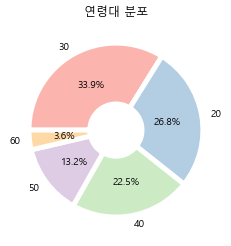

In [206]:
colors = cm.get_cmap('Pastel1')(np.arange(5))
wedgeprops = {'width':0.7 , 'edgecolor':'w','linewidth' : 5}

a = eda_df['나이대'].value_counts().reset_index()

plt.pie( a.나이대,labels = a['index'] , autopct='%.1f%%', startangle=180, counterclock=False,
       colors=colors, wedgeprops=wedgeprops)
plt.title('연령대 분포')
plt.show()

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

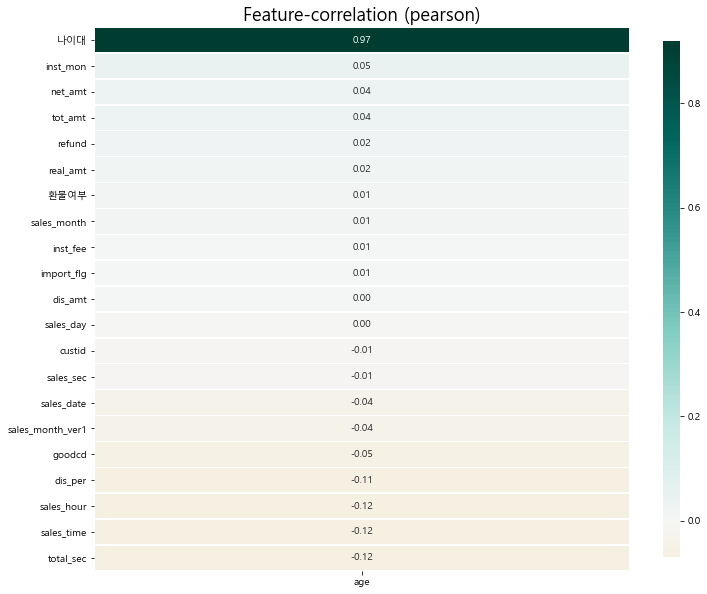

In [207]:
klib.corr_plot(eda_df, target='age')

In [208]:
# 인기goodcd
eda_df.goodcd.value_counts().reset_index().head(6)['index'].to_list()

[2700000000000,
 4405620026000,
 2116050008000,
 2139141008000,
 4104840008000,
 2116052008000]

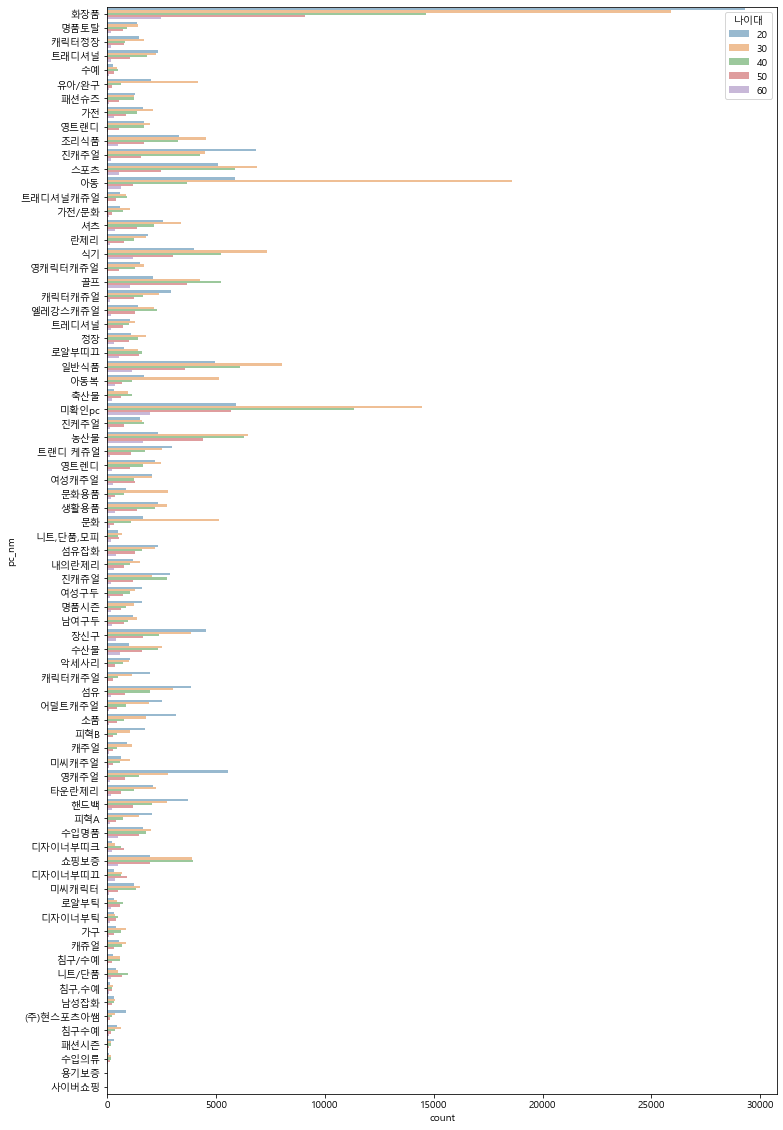

In [209]:
f,ax= plt.subplots(figsize=(12,20))
ax=sns.countplot(y='pc_nm', data= eda_df , alpha=0.5 , hue = '나이대')
plt.show()

In [210]:
pc20 = eda_df.query('나이대 == 20').pc_nm.value_counts().head(20).reset_index()
pc30 =eda_df.query('나이대 == 30').pc_nm.value_counts().head(20).reset_index()
pc40 =eda_df.query('나이대 == 40').pc_nm.value_counts().head(20).reset_index()
pc50 =eda_df.query('나이대 == 50').pc_nm.value_counts().head(20).reset_index()
pc60 =eda_df.query('나이대 == 60').pc_nm.value_counts().head(20).reset_index()

pc = pd.concat([pc20,pc30, pc40,pc50,pc60], axis = 1) ; pc

,index,pc_nm,index,pc_nm,index,pc_nm,index,pc_nm,index,pc_nm
0,화장품,29296,화장품,25886,화장품,14623,화장품,9106,화장품,2462
1,진캐주얼,6851,아동,18590,미확인pc,11315,미확인pc,5680,미확인pc,1946
2,미확인pc,5928,미확인pc,14475,농산물,6270,농산물,4380,농산물,1630
3,아동,5853,일반식품,8048,일반식품,6081,골프,3675,식기,1167
4,영캐주얼,5529,식기,7346,스포츠,5853,일반식품,3577,일반식품,1126
5,스포츠,5084,스포츠,6890,골프,5231,식기,3021,골프,1065
6,일반식품,4970,농산물,6474,식기,5219,스포츠,2455,아동,656
7,장신구,4537,아동복,5157,진캐주얼,4272,쇼핑보증,1960,수산물,597
8,식기,3987,문화,5150,쇼핑보증,3921,조리식품,1709,로얄부띠끄,556
9,섬유,3847,조리식품,4542,아동,3643,장신구,1650,스포츠,556


In [211]:
brd_nm20 = eda_df.query('나이대 == 20').brd_nm.value_counts().head(20).reset_index()
brd_nm30 =eda_df.query('나이대 == 30').brd_nm.value_counts().head(20).reset_index()
brd_nm40 =eda_df.query('나이대 == 40').brd_nm.value_counts().head(20).reset_index()
brd_nm50 =eda_df.query('나이대 == 50').brd_nm.value_counts().head(20).reset_index()
brd_nm60 =eda_df.query('나이대 == 60').brd_nm.value_counts().head(20).reset_index()

brd = pd.concat([brd_nm20,brd_nm30, brd_nm40,brd_nm50,brd_nm60], axis = 1) ; brd

,index,brd_nm,index,brd_nm,index,brd_nm,index,brd_nm,index,brd_nm
0,식품,21889,식품,43400,식품,36289,식품,20862,식품,6820
1,랑콤,3692,랑콤,2633,지오다노,2921,지오다노,1267,에스티로더,308
2,지오다노,3583,지오다노,2327,폴로,1733,폴로,1043,시세이도,292
3,크리니크,2946,샤넬,2278,에스티로더,1592,에스티로더,998,랑콤,217
4,샤넬,2592,에스티로더,2251,랑콤,1456,랑콤,832,시슬리,212
5,에스티로더,2194,NUK,2184,아모레,1390,시세이도,823,크리스챤디올화장품,180
6,메이컵포에버,2172,크리니크,2121,샤넬,1243,샤넬,699,샤넬,171
7,크리스챤디올화장품,2089,아베다,1822,시슬리,1073,시슬리,691,지오다노,150
8,아베다,1879,아모레,1780,크리니크,1063,크리니크,657,크리니크,143
9,폴로,1725,크리스챤디올화장품,1768,크리스챤디올화장품,1033,크리스챤디올화장품,639,피에르가르뎅,138


In [212]:
goodcd20 = eda_df.query('나이대 == 20').goodcd.value_counts().head(20).reset_index()
goodcd30 =eda_df.query('나이대 == 30').goodcd.value_counts().head(20).reset_index()
goodcd40 =eda_df.query('나이대 == 40').goodcd.value_counts().head(20).reset_index()
goodcd50 =eda_df.query('나이대 == 50').goodcd.value_counts().head(20).reset_index()
goodcd60 =eda_df.query('나이대 == 60').goodcd.value_counts().head(20).reset_index()

goodcd = pd.concat([goodcd20,goodcd30, goodcd40,goodcd50,goodcd60], axis = 1) ; goodcd

,index,goodcd,index,goodcd,index,goodcd,index,goodcd,index,goodcd
0,2700000000000,21889,2700000000000,43400,2700000000000,36289,2700000000000,20862,2700000000000,6820
1,2139141008000,3154,4104840008000,2278,4405620026000,2348,4405620026000,1019,2116050008000,308
2,2116052008000,2944,2116050008000,2251,2116050008000,1592,2116050008000,998,4124180008000,292
3,4405620026000,2881,2139141008000,2162,4109310008000,1390,4124180008000,823,4125440008000,186
4,4104840008000,2592,2116052008000,2120,4104840008000,1243,4104840008000,699,4109160008000,180
5,2116050008000,2194,4405620026000,1880,2139141008000,1160,2116052008000,657,2139141008000,172
6,4106530008200,2172,4132320008000,1822,2116052008000,1063,2139141008000,656,4104840008000,171
7,4109160008000,2089,4109310008000,1780,4109160008000,1033,4109160008000,639,2116052008000,143
8,4132320008000,1879,4109160008000,1768,4124180008000,946,4109310008000,617,4132320008000,136
9,2139143008000,1667,4106530008200,1370,4125440008000,794,4132320008000,545,4405620026000,129


In [213]:
corner_nm20 = eda_df.query('나이대 == 20').corner_nm.value_counts().head(20).reset_index()
corner_nm30 =eda_df.query('나이대 == 30').corner_nm.value_counts().head(20).reset_index()
corner_nm40 =eda_df.query('나이대 == 40').corner_nm.value_counts().head(20).reset_index()
corner_nm50 =eda_df.query('나이대 == 50').corner_nm.value_counts().head(20).reset_index()
corner_nm60 =eda_df.query('나이대 == 60').corner_nm.value_counts().head(20).reset_index()

corner = pd.concat([corner_nm20,corner_nm30, corner_nm40,corner_nm50,corner_nm60], axis = 1) ; corner

,index,corner_nm,index,corner_nm,index,corner_nm,index,corner_nm,index,corner_nm
0,수입종합화장품,24319,수입종합화장품,21339,용기보증,15237,수입종합화장품,7763,용기보증,2423
1,영캐주얼,8425,용기보증,18371,수입종합화장품,11861,용기보증,7643,수입종합화장품,2171
2,용기보증,7917,아동복,8057,진캐쥬얼,5284,야채,2481,야채,886
3,진캐쥬얼,4973,아동,6754,야채,3743,영캐주얼,1903,골프웨어,626
4,미확인코너,4744,미확인코너,5730,영캐주얼,3155,진캐쥬얼,1876,청과,551
5,란제리,4515,영캐주얼,5252,란제리,3109,란제리,1823,주방용품,495
6,캐릭터,4005,란제리,4845,캐릭터,2462,캐릭터,1638,란제리,457
7,핸드백,3473,유아복,4321,트래디셔널,2271,골프웨어,1525,수입부띠끄,361
8,스타킹,2605,진캐쥬얼,3819,미확인코너,2229,트래디셔널,1427,생선,331
9,진캐주얼,2533,캐릭터,3602,아동복,2190,청과,1379,미확인코너,320


In [214]:
buyer_nm20 = eda_df.query('나이대 == 20').buyer_nm.value_counts().head(20).reset_index()
buyer_nm30 =eda_df.query('나이대 == 30').buyer_nm.value_counts().head(20).reset_index()
buyer_nm40 =eda_df.query('나이대 == 40').buyer_nm.value_counts().head(20).reset_index()
buyer_nm50 =eda_df.query('나이대 == 50').buyer_nm.value_counts().head(20).reset_index()
buyer_nm60 =eda_df.query('나이대 == 60').buyer_nm.value_counts().head(20).reset_index()

buyer = pd.concat([buyer_nm20,buyer_nm30, buyer_nm40,buyer_nm50,buyer_nm60], axis = 1) ; buyer

,index,buyer_nm,index,buyer_nm,index,buyer_nm,index,buyer_nm,index,buyer_nm
0,화장품,30828,일반식품,43401,일반식품,36290,일반식품,20862,일반식품,6820
1,일반식품,21889,화장품,26741,화장품,15036,화장품,9377,화장품,2499
2,유니캐주얼,14425,유아동복,26537,스포츠,11172,스포츠,6191,스포츠,1639
3,영캐주얼,11632,스포츠,11341,유니캐주얼,10102,유니캐주얼,4094,수입명품,1223
4,캐릭터캐주얼,10565,유니캐주얼,9999,영캐주얼,6362,니트단품,3863,니트단품,1104
5,유아동복,9184,영캐주얼,9953,니트단품,5767,수입명품,3702,유아동복,1076
6,섬유,8903,문화완구,9793,유아동복,5121,캐릭터캐주얼,3515,섬유,837
7,스포츠,7500,캐릭터캐주얼,8932,섬유,4940,영캐주얼,3466,디자이너부띠끄,733
8,니트단품,7447,니트단품,7610,트래디셔널캐주얼,4870,섬유,3024,조리욕실,707
9,피혁A,6339,섬유,7462,캐릭터캐주얼,4443,트래디셔널캐주얼,2685,정장셔츠,640


In [215]:
part_nm20 = eda_df.query('나이대 == 20').part_nm.value_counts().head(20).reset_index()
part_nm30 =eda_df.query('나이대 == 30').part_nm.value_counts().head(20).reset_index()
part_nm40 =eda_df.query('나이대 == 40').part_nm.value_counts().head(20).reset_index()
part_nm50 =eda_df.query('나이대 == 50').part_nm.value_counts().head(20).reset_index()
part_nm60 =eda_df.query('나이대 == 60').part_nm.value_counts().head(20).reset_index()

part = pd.concat([part_nm20,part_nm30, part_nm40,part_nm50,part_nm60], axis = 1) ; part

,index,part_nm,index,part_nm,index,part_nm,index,part_nm,index,part_nm
0,패션잡화,18075,공산품,19760,공산품,15106,명품잡화,6905,잡화파트,2083
1,명품잡화,16759,"케주얼,구두,아동",16158,생식품,10674,공산품,6821,공산품,1879
2,영플라자,13489,명품잡화,14355,명품잡화,9887,잡화파트,6658,생식품,1859
3,잡화파트,13334,잡화파트,13307,잡화파트,8339,생식품,5747,"케주얼,구두,아동",1607
4,공산품,12268,패션잡화,13139,"케주얼,구두,아동",8264,"케주얼,구두,아동",5092,생식품파트,1550
5,"케주얼,구두,아동",9719,생식품,12440,가정용품,7571,공산품파트,4255,공산품파트,1534
6,여성캐주얼,8689,"아동,스포츠",10991,패션잡화,6020,생식품파트,4039,명품잡화,1473
7,잡화,8388,가정용품,10468,공산품파트,6015,가정용품,3576,가정용품,1151
8,가정용품,6165,아동문화,10398,잡화,6012,여성정장,3486,남성정장스포츠,1150
9,남성의류,5648,아동,8550,골프/유니캐쥬얼,5816,패션잡화,3287,여성정장,891


### raw data feature generation

In [216]:
df['sales_month_ver1'] = df['sales_month']
df['sales_month'] = df['sales_month'].apply(lambda x : x-12 if x > 12 else x )
df['sales_hour'] = df['sales_time'].apply(lambda x : x//100 )
df['sales_sec'] = df['sales_time'].apply(lambda x : x%100 )
df['total_sec'] = df['sales_time'].apply(lambda x : x//100*60 + x%100 )
df['dis_per'] = (( df['dis_amt'] / df['tot_amt'] )*100 ).apply(lambda x : math.trunc(x))
df['환불여부'] = df['tot_amt'].apply(lambda x : 1 if x < 0 else 0 )
df['refund'] = df['tot_amt'].apply(lambda x : abs(x) if x < 0 else 0 )
# df['tot_amt'] = df['tot_amt'] .apply(lambda x : 0 if x < 0 else x )
df['real_amt'] = ( df['tot_amt'] / df['inst_mon'] ).apply(lambda x : math.trunc(x)) 
df['sales_date'] =df['sales_month_ver1'].astype(str).apply(lambda x : "0"+x if len(x) == 1  else x ) +df['sales_day'].astype(str).apply(lambda x : "0"+x if len(x) == 1 else  x )
df['sales_date'] = df['sales_date'].astype(int)

In [217]:
df

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,...,inst_fee,sales_month_ver1,sales_hour,sales_sec,total_sec,dis_per,환불여부,refund,real_amt,sales_date
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,...,0,6,12,12,732,10,0,0,30000,625
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,...,0,6,12,42,762,10,0,0,39000,625
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,...,0,8,18,10,1090,10,0,0,58333,826
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,...,0,8,18,30,1110,10,0,0,151666,826
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,...,0,9,18,2,1082,10,0,0,33333,903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414950,49993,1,31,수,1750,신촌점,4405551020474,톰키드,아동,아동,...,0,13,17,50,1070,0,0,0,20000,1331
414951,49993,1,31,수,1833,신촌점,2139140008300,폴로화장품,향수,화장품,...,0,13,18,33,1113,5,0,0,70000,1331
414952,49994,4,14,토,1750,본점,4230120011274,스테파넬,영트랜드,영트렌디,...,0,16,17,50,1070,0,0,0,39000,1614
414953,49994,4,14,토,1810,본점,4409271026010,써스데이아일앤드,진케주얼,진케주얼,...,0,16,18,10,1090,0,0,0,34200,1614


### Feature generation

In [218]:
features = []

- 총구매액, 구매건수, 평균구매액, 최대구매액, 최소구매액

In [219]:
f = df.groupby('custid')['tot_amt'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최대구매액', np.max),
                                            ('최소구매액', np.min)]).reset_index()

features.append(f)

- 환불 : 총구매액, 구매건수, 평균구매액, 최대구매액, 최소구매액

In [220]:
f = df.groupby('custid')['refund'].agg([('총환불액', np.sum),
                                            ('환불건수', np.size),
                                            ('평균환불액', lambda x : np.round(np.mean(x))),
                                            ('최대환불액', np.max),
                                            ('최소환불액', np.min)]).reset_index()
features.append(f)

- 주말방문비율, 주중방문비율

In [221]:
day = {'월' : 0 , '화' : 1 , '수' : 2 , '목' : 3 , '금' : 4 , '토': 5 , '일' : 6 }

df['sales_dayofweek_num'] = df['sales_dayofweek'].apply(lambda x : day[x] )

f = df.groupby('custid')['sales_dayofweek_num'].agg([
    ('주말방문비율', lambda x: np.mean(x >4)),
    ('주중방문비율' , lambda x : np.mean(x<5))
]).reset_index()

features.append(f)

- 계절방문비율

In [222]:
f = df.groupby('custid')['sales_month'].agg([
    ('봄-구매비율', lambda x: np.mean( x.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean( x.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean( x.isin([1,2,12])))
]).reset_index()

features.append(f)

- (월별) 총구매액, 구매건수, 평균구매액, 최대구매액, 최소구매액

In [223]:
f = pd.pivot_table(df,index='custid',columns='sales_month',values='tot_amt',aggfunc = ['sum','size','mean','max','min'],fill_value=0).reset_index()

features.append(f)

- 시간대별방문비율 : 3파트로

In [224]:
f = df.groupby('custid')['sales_hour'].agg([
    ('아침-구매비율', lambda x: np.mean( x.isin([0,1,8,9,10,11,12]))),
    ('점심-구매비율', lambda x: np.mean( x.isin([13,14,15,16]))),
    ('저녁-구매비율', lambda x: np.mean(x.isin([17,18,19,20,21,22])))
]).reset_index()

features.append(f)

- 수입상품구매비율, 국내상품구매비율

In [225]:
f = df.groupby('custid')['import_flg'].agg([
    ('수입상품구매비율', lambda x: np.mean( x.isin([1]))),
    ('국내상품구매비율', lambda x: np.mean( x.isin([0])))
]).reset_index()

features.append(f)

- 구매브랜드수

In [226]:
f = df.groupby('custid')['brd_nm'].agg([
    ('구매브랜드수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 구매코너수_corner_nm

In [227]:
f = df.groupby('custid')['corner_nm'].agg([
    ('구매코너수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 구매상품군수_pc_nm

In [228]:
f = df.groupby('custid')['pc_nm'].agg([
    ('구매상품군수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 구매파트수_part_nm

In [229]:
f = df.groupby('custid')['part_nm'].agg([
    ('구매파트수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 구매상품팀수_team_nm

In [230]:
f = df.groupby('custid')['team_nm'].agg([
    ('구매상품팀수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 구매상품바이어수_buyer_nm

In [231]:
f = df.groupby('custid')['buyer_nm'].agg([
    ('구매상품바이어수', lambda x : x.nunique())]).reset_index()

features.append(f)

- 내점일수, 구매주기

In [232]:
f = df.groupby('custid')['sales_date'].agg([
    ('내점일수',lambda x: x.nunique()),
    ('구매주기', lambda x: (x.max() - x.min()) / x.nunique())]).reset_index()

features.append(f)

- 주방문요일

In [233]:
f = df.groupby('custid')['sales_dayofweek'].agg([('주방문요일', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주방문요일'])

In [234]:
features.append(f)

- 평균실구매액_할부

In [235]:
f = df.groupby('custid')['real_amt'].agg([('평균실구매액', 'mean')]).reset_index()

features.append(f)

- 평균할부개월수 , 최대할부개월수

In [236]:
f = df.groupby('custid')['inst_mon'].agg([('평균할부개월수', 'mean'),
                                        ('최대할부개월수', np.max)]).reset_index()

features.append(f)

- 고가상품구매비율, 저가상품구매비율

In [237]:
f = df.groupby('custid')['tot_amt'].agg([
    ('고가상품구매비율', lambda x: np.mean(x > df.tot_amt.quantile(.90) )),
    ('저가상품구매비율', lambda x: np.mean( x < df.tot_amt.quantile(.10) ))
]).reset_index()

features.append(f)

- 인기코너상품구매비율 (  수입종합화장품, 용기보증, 영캐주얼, 진캐쥬얼, 란제리, 미확인코너, 아동복, 캐릭터, 야채, 핸드백, 스타킹, 유아복, 영트랜드, 아동, 골프웨어, 청과, 트래디셔널, 수입부띠끄, 생선, 완구, 신생아 )

In [238]:
f = df.groupby('custid')['corner_nm'].agg([
    ('수입종합화장품_corner구매비율', lambda x: np.mean( x.isin(["수입종합화장품"]))),
    ('용기보증_corner구매비율', lambda x: np.mean( x.isin(["용기보증"]))),
    ('영캐주얼_corner구매비율', lambda x: np.mean( x.isin(["영캐주얼"]))),
    ('진캐쥬얼_corner구매비율', lambda x: np.mean( x.isin(["진캐쥬얼"]))),
    ('란제리_corner구매비율', lambda x: np.mean( x.isin(["란제리"]))),
    ('미확인코너_corner구매비율', lambda x: np.mean( x.isin(["미확인코너"]))),
    ('아동복_corner구매비율', lambda x: np.mean( x.isin(["아동복"]))),
    ('캐릭터_corner구매비율', lambda x: np.mean( x.isin(["캐릭터"]))),
    ('야채_corner구매비율', lambda x: np.mean( x.isin(["야채"]))),
    ('핸드백_corner구매비율', lambda x: np.mean( x.isin(["핸드백"]))),
    ('스타킹_corner구매비율', lambda x: np.mean( x.isin(["스타킹"]))),
    ('유아복_corner구매비율', lambda x: np.mean( x.isin(["유아복"]))),
    ('영트랜드_corner구매비율', lambda x: np.mean( x.isin(["영트랜드"]))),
    ('아동_corner구매비율', lambda x: np.mean( x.isin(["아동"]))),
    ('골프웨어_corner구매비율', lambda x: np.mean( x.isin(["골프웨어"]))),
    ('청과_corner구매비율', lambda x: np.mean( x.isin(["청과"]))),
    ('트래디셔널_corner구매비율', lambda x: np.mean( x.isin(["트래디셔널"]))),
    ('수입부띠끄_corner구매비율', lambda x: np.mean( x.isin(["수입부띠끄"]))),
    ('생선_corner구매비율', lambda x: np.mean( x.isin(["생선"]))),
    ('완구_corner구매비율', lambda x: np.mean( x.isin(["완구"]))),
    ('신생아_corner구매비율', lambda x: np.mean( x.isin(["신생아"])))
]).reset_index()

features.append(f)

- 인기pc_nm구매비율 (화장품, 미확인pc, 아동, 일반식품, 농산물, 스포츠, 식기 , 진캐주얼, 골프, 아동복, 장신구, 로얄부띠끄, 쇼핑보증, 문화, 섬유 )

In [239]:
f = df.groupby('custid')['pc_nm'].agg([
    ('화장품_pc구매비율', lambda x: np.mean( x.isin(["화장품"]))),
    ('미확인pc_pc구매비율', lambda x: np.mean( x.isin(["미확인pc"]))),
    ('아동_pc구매비율', lambda x: np.mean( x.isin(["아동"]))),
    ('일반식품_pc구매비율', lambda x: np.mean( x.isin(["일반식품"]))),
    ('농산물_pc구매비율', lambda x: np.mean( x.isin(["농산물"]))),
    ('스포츠_pc구매비율', lambda x: np.mean( x.isin(["스포츠"]))),
    ('식기_pc구매비율', lambda x: np.mean( x.isin(["식기"]))),
    ('진캐주얼_pc구매비율', lambda x: np.mean( x.isin(["진캐주얼"]))),
    ('골프_pc구매비율', lambda x: np.mean( x.isin(["골프"]))),
    ('아동복_pc구매비율', lambda x: np.mean( x.isin(["아동복"]))),
    ('장신구_pc구매비율', lambda x: np.mean( x.isin(["장신구"]))),
    ('로얄부띠끄_pc구매비율', lambda x: np.mean( x.isin(["로얄부띠끄"]))),
    ('쇼핑보증_pc구매비율', lambda x: np.mean( x.isin(["쇼핑보증"]))),
    ('문화_pc구매비율', lambda x: np.mean( x.isin(["문화"]))),
    ('섬유_pc구매비율', lambda x: np.mean( x.isin(["섬유"])))    
]).reset_index()

features.append(f)

- 인기buyer_nm구매비율 ( 일반식품, 화장품, 유아동복, 유니캐주얼, 스포츠, 영캐주얼, 캐릭터캐주얼, 니트단품, 섬유, 피혁A, 피혁B, 문화완구, 트래디셔널캐주얼, 수입명품, 디자이너부띠끄, 조리욕실, 정장셔츠, 엘레강스캐주얼 ) 

In [240]:
f = df.groupby('custid')['buyer_nm'].agg([
    ('일반식품_bn구매비율', lambda x: np.mean( x.isin(["일반식품"]))),
    ('화장품_bn구매비율', lambda x: np.mean( x.isin(["화장품"]))),
    ('유아동복_bn구매비율', lambda x: np.mean( x.isin(["유아동복"]))),
    ('유니캐주얼_bn구매비율', lambda x: np.mean( x.isin(["유니캐주얼"]))),
    ('스포츠_bn구매비율', lambda x: np.mean( x.isin(["스포츠"]))),
    ('캐릭터캐주얼_bn구매비율', lambda x: np.mean( x.isin(["캐릭터캐주얼"]))),
    ('니트단품_bn구매비율', lambda x: np.mean( x.isin(["니트단품"]))),
    ('섬유_bn구매비율', lambda x: np.mean( x.isin(["섬유"]))),
    ('피혁A_bn구매비율', lambda x: np.mean( x.isin(["피혁A"]))),
    ('피혁B_bn구매비율', lambda x: np.mean( x.isin(["피혁B"]))),
    ('문화완구_bn구매비율', lambda x: np.mean( x.isin(["문화완구"]))),
    ('트래디셔널캐주얼_bn구매비율', lambda x: np.mean( x.isin(["트래디셔널캐주얼"]))),
    ('수입명품_bn구매비율', lambda x: np.mean( x.isin(["수입명품"]))),
    ('디자이너부띠끄_bn구매비율', lambda x: np.mean( x.isin(["디자이너부띠끄"]))),
    ('조리욕실_bn구매비율', lambda x: np.mean( x.isin(["조리욕실"]))),
    ('정장셔츠_bn구매비율', lambda x: np.mean( x.isin(["정장셔츠"]))),
    ('엘레강스캐주얼_bn구매비율', lambda x: np.mean( x.isin(["엘레강스캐주얼"])))
]).reset_index()

features.append(f)

- 인기브랜드구매비율 ( 식품 , 지오다노, 랑콤, 에스티로더, 샤넬, 크리니크, 폴로 , 시세이도 , 시슬리, NUK , 크리스챤디올화장품, 메이크업포에버, 아모레 , 아베다 )

In [241]:
f = df.groupby('custid')['brd_nm'].agg([
    ('식품_brd구매비율', lambda x: np.mean( x.isin(["식품"]))),
    ('지오다노_brd구매비율', lambda x: np.mean( x.isin(["지오다노"]))),
    ('랑콤_brd구매비율', lambda x: np.mean( x.isin(["랑콤"]))),
    ('에스티로더_brd구매비율', lambda x: np.mean( x.isin(["에스티로더"]))),
    ('샤넬_brd구매비율', lambda x: np.mean( x.isin(["샤넬"]))),
    ('크리니크_brd구매비율', lambda x: np.mean( x.isin(["크리니크"]))),
    ('폴로_brd구매비율', lambda x: np.mean( x.isin(["폴로"]))),
    ('시세이도_brd구매비율', lambda x: np.mean( x.isin(["시세이도"]))),
    ('시슬리_brd구매비율', lambda x: np.mean( x.isin(["시슬리"]))),
    ('NUK_brd구매비율', lambda x: np.mean( x.isin(["NUK"]))),
    ('크리스챤디올화장품_brd구매비율', lambda x: np.mean( x.isin(["크리스챤디올화장품"]))),
    ('메이크업포에버_brd구매비율', lambda x: np.mean( x.isin(["메이크업포에버"]))),
    ('아모레_brd구매비율', lambda x: np.mean( x.isin(["아모레"]))),
    ('아베다_brd구매비율', lambda x: np.mean( x.isin(["아베다"])))
]).reset_index()

features.append(f)

- 인기goodcd구매비율 ( 2700000000000, 4405620026000, 2116050008000, 2139141008000, 4104840008000, 2116052008000, 4124180008000,4109310008000 , 4125440008000, 4106530008200 ) 

In [242]:
f = df.groupby('custid')['goodcd'].agg([
    ('2700000000000', lambda x: np.mean( x.isin([2700000000000]))),
    ('4405620026000', lambda x: np.mean( x.isin([4405620026000]))),
    ('2116050008000', lambda x: np.mean( x.isin([2116050008000]))),
    ('2139141008000', lambda x: np.mean( x.isin([2139141008000]))),
    ('4104840008000', lambda x: np.mean( x.isin([4104840008000]))),
    ('2116052008000', lambda x: np.mean( x.isin([2116052008000]))),
    ('4124180008000', lambda x: np.mean( x.isin([4124180008000]))),
    ('4109310008000', lambda x: np.mean( x.isin([4109310008000]))),
    ('4125440008000', lambda x: np.mean( x.isin([4125440008000]))),
    ('4106530008200', lambda x: np.mean( x.isin([4106530008200])))
]).reset_index()

features.append(f)

- 인기part_nm구매비율 ( 패션잡화, 공산품, 명품잡화, 잡화파트, 케주얼,구두,아동 , 생식품, 영플라자, 가정용품, 아동,스포츠, 여성캐주얼, 잡화, 여성정장, 남성정장스포츠, 골프/유니캐쥬얼, 스포츠캐쥬얼, 영캐릭터 )

In [243]:
f = df.groupby('custid')['part_nm'].agg([
    ('패션잡화_part구매비율', lambda x: np.mean( x.isin(["패션잡화"]))),
    ('공산품_part구매비율', lambda x: np.mean( x.isin(["공산품"]))),
    ('명품잡화_part구매비율', lambda x: np.mean( x.isin(["명품잡화"]))),
    ('잡화파트_part구매비율', lambda x: np.mean( x.isin(["잡화파트"]))),
    ('케주얼,구두,아동_part구매비율', lambda x: np.mean( x.isin(["케주얼,구두,아동"]))),
    ('생식품_part구매비율', lambda x: np.mean( x.isin(["생식품"]))),
    ('영플라자_part구매비율', lambda x: np.mean( x.isin(["영플라자"]))),
    ('가정용품_part구매비율', lambda x: np.mean( x.isin(["가정용품"]))),
    ('아동,스포츠_part구매비율', lambda x: np.mean( x.isin(["아동,스포츠"]))),
    ('여성캐주얼_part구매비율', lambda x: np.mean( x.isin(["여성캐주얼"]))),
    ('잡화_part구매비율', lambda x: np.mean( x.isin(["잡화"]))),
    ('남성정장스포츠_part구매비율', lambda x: np.mean( x.isin(["남성정장스포츠"]))),
    ('골프/유니캐쥬얼_part구매비율', lambda x: np.mean( x.isin(["골프/유니캐쥬얼"]))),
    ('스포츠캐쥬얼_part구매비율', lambda x: np.mean( x.isin(["스포츠캐쥬얼"]))),
    ('영캐릭터_part구매비율', lambda x: np.mean( x.isin(["영캐릭터"])))
]).reset_index()

features.append(f)

- 주구매지점

In [244]:
f = df.groupby('custid')['str_nm'].agg([('주구매지점', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매지점'])

features.append(f)

- 주구매코너

In [245]:
f = df.groupby('custid')['corner_nm'].agg([('주구매코너', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매코너'])

features.append(f)

- 주구매브랜드

In [246]:
f = df.groupby('custid')['brd_nm'].agg([('주구매브랜드', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매브랜드'])

features.append(f)

- 주구매pc

In [247]:
f = df.groupby('custid')['pc_nm'].agg([('주구매pc', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매pc'])

features.append(f)

- 주구매part

In [248]:
f = df.groupby('custid')['part_nm'].agg([('주구매part', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매part'])

features.append(f)

- 주구매team

In [249]:
f = df.groupby('custid')['team_nm'].agg([('주구매team', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매team'])

features.append(f)

- 주구매buyer

In [250]:
f = df.groupby('custid')['buyer_nm'].agg([('주구매buyer', lambda x: x.value_counts().index[0])]).reset_index()
f = pd.get_dummies(f, columns=['주구매buyer'])

features.append(f)

- 평균할인율, 최대할인율

In [251]:
f = df.groupby('custid')['dis_per'].agg([('평균할인율', 'mean'),
                                         ('최대할인율' , np.max )]).apply(lambda x : x/10).reset_index()

features.append(f)

- 평균쇼핑시간 , 총쇼핑시간

In [252]:
f = df.groupby('custid')['total_sec'].agg([
    ('평균쇼핑시간', lambda x: (x.max() - x.min()) / x.nunique()),
    ('총쇼핑시간' , 'sum')]).reset_index()

features.append(f)

- 수입상품구매건수

In [253]:
f = df.groupby(['custid'])['import_flg'].agg([('수입상품구매건수', 'sum')]).reset_index()

features.append(f)

- 구매브랜드다양성

In [254]:
a = df.corner_nm.nunique()
f = df.groupby('custid')['brd_nm'].agg([('구매브랜드다양성', lambda x: len(x.unique()) / a)]).reset_index()
features.append(f)

- 구매상품다양성_pc_nm

In [255]:
a = df.pc_nm.nunique()
f = df.groupby('custid')['pc_nm'].agg([('구매상품다양성', lambda x: len(x.unique()) / a)]).reset_index()
features.append(f)

- 구매코너다양성_corner_nm

In [256]:
a = df.corner_nm.nunique()
f = df.groupby('custid')['corner_nm'].agg([('구매코너다양성', lambda x: len(x.unique()) / a)]).reset_index()
features.append(f)

- 구매바이어다양성_buyer_nm

In [257]:
a = df.buyer_nm.nunique()
f = df.groupby('custid')['buyer_nm'].agg([('구매바이어다양성', lambda x: len(x.unique()) / a)]).reset_index()
features.append(f)

- pivot table

In [258]:
#파트
f = df.groupby(['custid','part_nm'])['tot_amt'].agg([('tot_amt_part', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_part', index=f.custid, columns='part_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [259]:
#코너
f = df.groupby(['custid','corner_nm'])['tot_amt'].agg([('tot_amt_corner', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_corner', index=f.custid, columns='corner_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [260]:
#pc
f = df.groupby(['custid','pc_nm'])['tot_amt'].agg([('tot_amt_pc', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_pc', index=f.custid, columns='pc_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [261]:
#브랜드
f = df.groupby(['custid','brd_nm'])['tot_amt'].agg([('tot_amt_brd', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_brd', index=f.custid, columns='brd_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [262]:
#구매자
f = df.groupby(['custid','buyer_nm'])['tot_amt'].agg([('tot_amt_buyer', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_buyer', index=f.custid, columns='buyer_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [263]:
#팀
f = df.groupby(['custid','team_nm'])['tot_amt'].agg([('tot_amt_team', 'sum')]).reset_index()
f =f.pivot_table(values='tot_amt_team', index=f.custid, columns='team_nm', aggfunc='first',fill_value=0).reset_index()

features.append(f)

In [264]:
ALL = pd.DataFrame({'custid': df.custid.unique()})
for f in features :
    ALL = pd.merge(ALL, f, how='left',on='custid')

- 방문당평균구매액, 방문당평균구매상품수

In [265]:
ALL['방문당평균구매액'] = ALL['총구매액'] / ALL['내점일수']
ALL['방문당평균구매상품수'] = ALL['구매건수'] / ALL['내점일수']

In [266]:
ALL['총환불액'] = ALL['총환불액']*(-1)
ALL['평균환불액'] =  ALL['평균환불액']*(-1)
ALL['최대환불액'] = ALL['최대환불액']*(-1)
ALL['최소환불액'] = ALL['최소환불액']*(-1)

In [267]:
ALL

,custid,총구매액,구매건수,평균구매액,최대구매액,최소구매액,총환불액,환불건수,평균환불액,최대환불액,...,행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품,식품팀,의류패션팀,인터넷백화점_y,잡화가용팀,방문당평균구매액,방문당평균구매상품수
0,0,1742000,11,158364,455000,39000,0,11,0,0,...,0,0,0,1056000,0,231000,0,1511000,248857.142857,1.571429
1,2,3750850,11,340986,1416000,-1416000,-1850500,11,-168227,-1416000,...,0,0,0,146000,0,1081500,0,2669350,535835.714286,1.571429
2,3,2300500,30,76683,621000,-621000,-695600,30,-23187,-621000,...,0,0,0,187000,25800,746200,0,1528500,176961.538462,2.307692
3,4,1045000,4,261250,560000,49000,0,4,0,0,...,0,0,0,60000,0,985000,0,60000,522500.000000,2.000000
4,5,5053759,32,157930,682000,20335,0,32,0,0,...,0,0,0,523000,343859,1620400,0,3089500,240655.190476,1.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,632000,4,158000,423000,52000,0,4,0,0,...,0,0,0,98000,0,475000,0,157000,316000.000000,2.000000
35963,49990,213000,1,213000,213000,213000,0,1,0,0,...,0,0,0,213000,0,0,0,213000,213000.000000,1.000000
35964,49992,221000,2,110500,168000,53000,0,2,0,0,...,0,0,0,53000,0,168000,0,53000,110500.000000,1.000000
35965,49993,143029,4,35757,70000,20000,0,4,0,0,...,0,0,0,70000,53029,0,0,90000,143029.000000,4.000000


####  feature to csv

In [268]:
ALL.to_csv('ALL피처추가060601.csv', index=False)